In [4]:
import zipfile
import os
import pandas as pd

# Path to the ZIP file
zip_path = 'titanic.zip'

# Extract contents
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('titanic_data')  # Extract to a folder

# List extracted files
print("Extracted files:", os.listdir('titanic_data'))


Extracted files: ['gender_submission.csv', 'test.csv', 'train.csv']


In [5]:
# Loading the training data
df = pd.read_csv('titanic_data/train.csv')
# Show the first 5 rows
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [6]:
# Value counts for key categorical columns
print("Survived:\n", df['Survived'].value_counts())
print("\nSex:\n", df['Sex'].value_counts())
print("\nPclass:\n", df['Pclass'].value_counts())

Survived:
 Survived
0    549
1    342
Name: count, dtype: int64

Sex:
 Sex
male      577
female    314
Name: count, dtype: int64

Pclass:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [7]:
#Basic info about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#summary statistics of numerical columns 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#Fixing missing values in age
df['Age'] = df['Age'].fillna(df['Age'].median())


In [12]:
#Fixing missing embarked 
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [13]:
#FCreating binary cabin feature
df['HasCabin'] = df['Cabin'].notnull().astype(int)

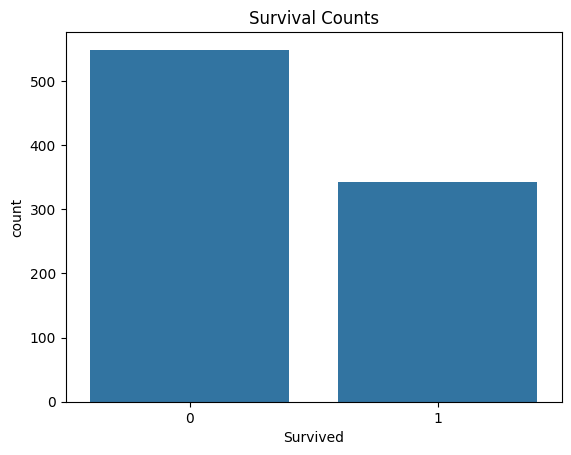

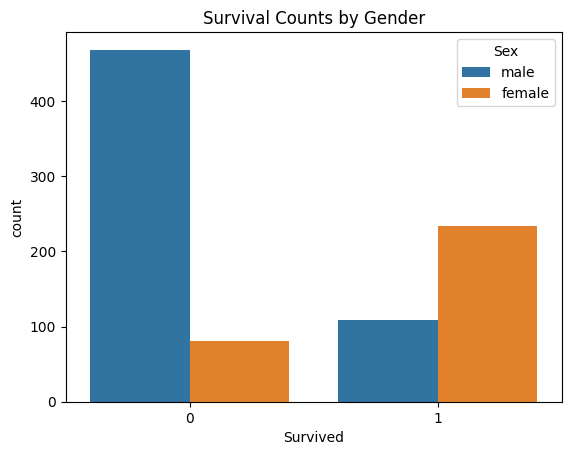

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Overall survival rate
sns.countplot(x='Survived', data=df)
plt.title('Survival Counts')
plt.show()

# Survival rate by gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Counts by Gender')
plt.show()


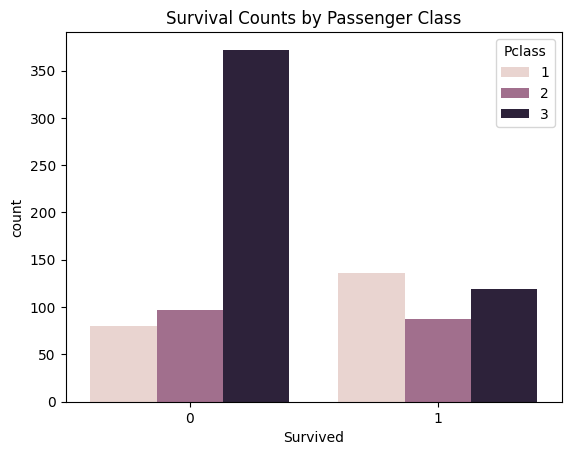

In [15]:
#Survival rate by passenger class (Pclass)
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Counts by Passenger Class')
plt.show()

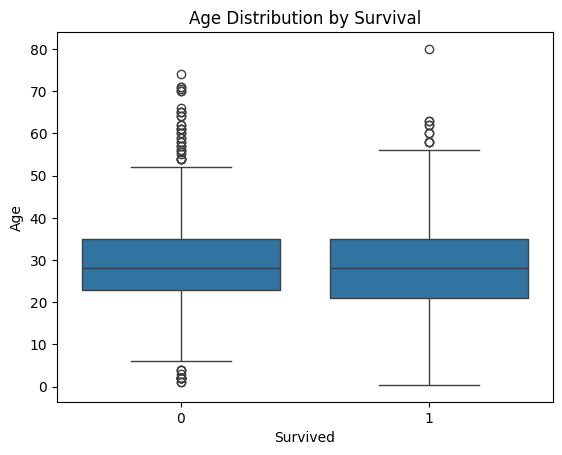

In [16]:
#Age distribution by survival 
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

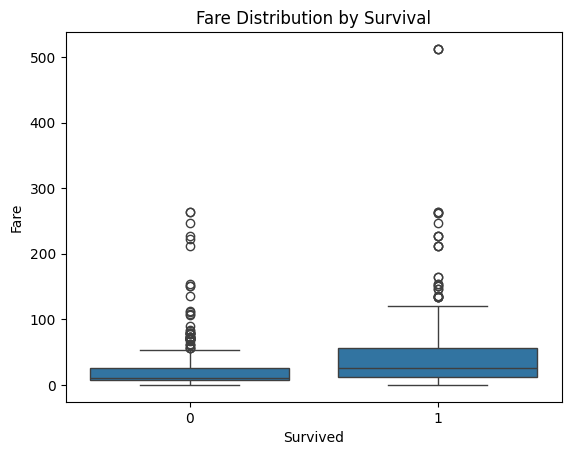

In [17]:
#Fare distribution by survival 
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.show()


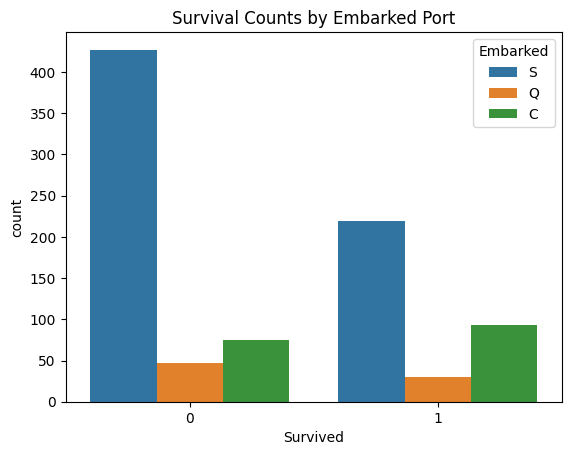

In [18]:
#embarked port and survival 
sns.countplot(x='Survived', hue='Embarked', data=df)
plt.title('Survival Counts by Embarked Port')
plt.show()


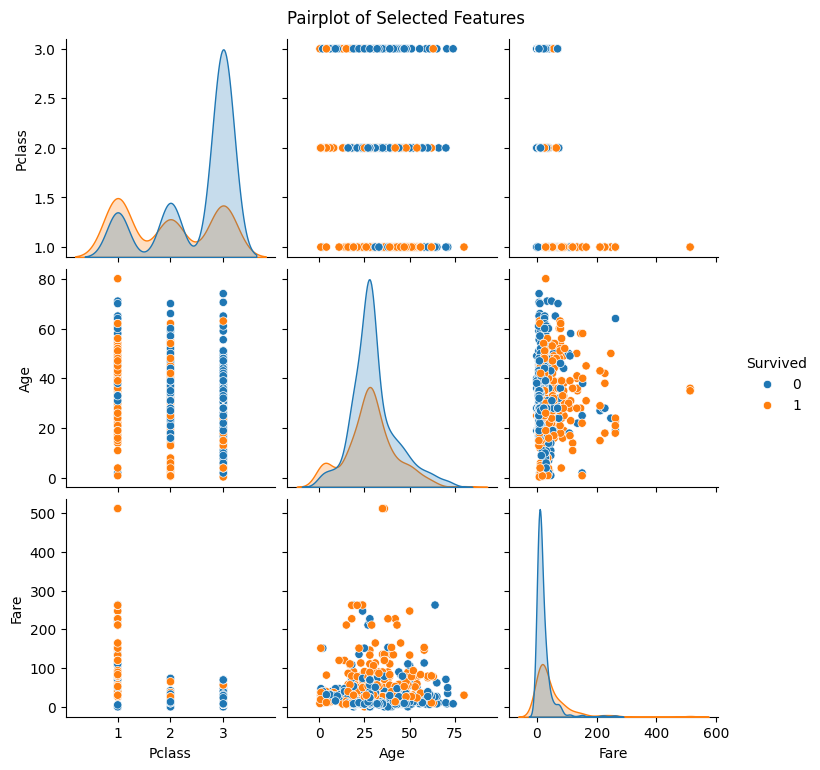

In [19]:
# Pairplot to visualize pairwise relationships
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

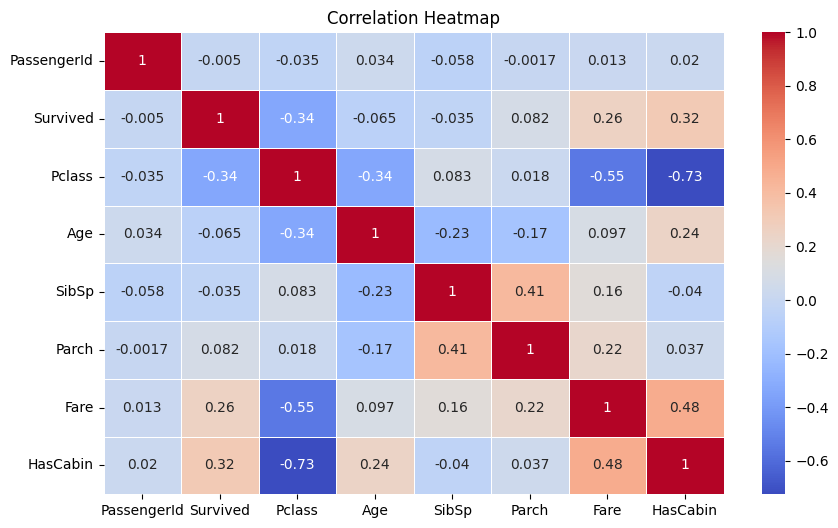

In [24]:
plt.figure(figsize=(10, 6))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Generate heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


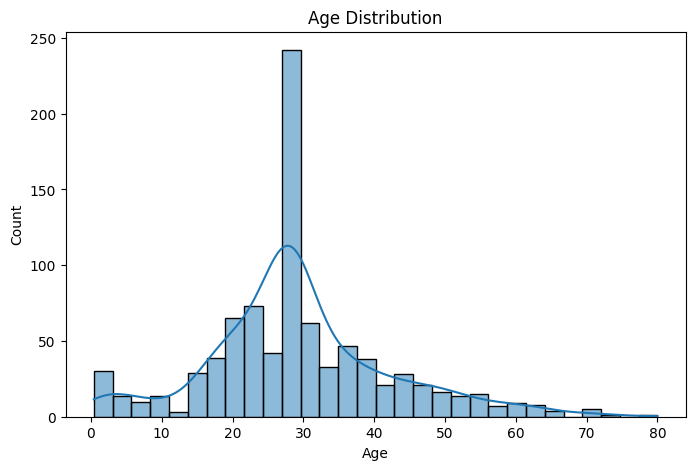

In [21]:
# Histogram of Age
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

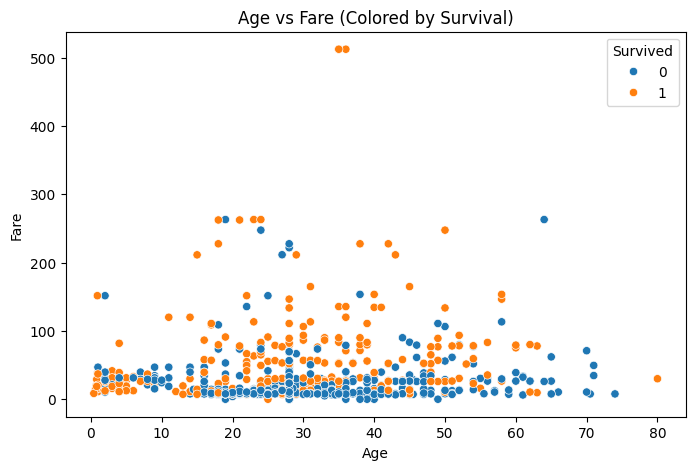

In [25]:
# Scatterplot of Age vs Fare
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Fare', data=df, hue='Survived')
plt.title('Age vs Fare (Colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

### 🔍 Observations

- Most passengers were between 20–40 years old.
- The survival rate appears higher in females and first-class passengers.
- Younger passengers had a slightly better survival rate.
- Higher fare generally correlates with higher survival chance.
- Some high-paying passengers were older, likely first-class travelers.


### 📌 Summary of Findings

- Majority of passengers did **not survive**.
- **Females** and **1st class** passengers had a significantly higher chance of survival.
- **Age and fare** play roles in survival — younger and wealthier passengers fared better.
- Data has some missing values in the `Age` column.
- Correlation heatmap shows strongest correlation between `Fare` and `Pclass`.